In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools

# Import preproceesing algorithm
from sklearn.model_selection import train_test_split

# Import classification algorithms
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Import evaluation algorithms
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc


# Functions

In [98]:
def classification_assessment(model, X_test, y_test):
    """
    Evaluate the performance of a classification model and return results as a dictionary entry.

    Parameters:
    - model: Trained classification model.
    - model_name: Name of the model as a string.
    - X_test: Test features.
    - y_test: True labels for the test set.

    Returns:
    - results: A dictionary with the model name as the key and evaluation metrics as the value.
    """
    # Predict class labels
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_pred, y_test)

    # Get probabilities for precision-recall and ROC curves
    probs = model.predict_proba(X_test)[:, 1]

    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, probs)
    prec_rec_auc = auc(recall, precision)

    # ROC
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # f1 score
    f1 = f1_score(y_test, y_pred)

    # Dictionary entry for the model
    results = {
            "accuracy": accuracy,
            "precision_recall_auc": prec_rec_auc,
            "roc_auc": roc_auc,
            "fpr_tpr": (fpr, tpr),
            "precision_recall": (precision, recall),
            "f1": f1
        }

    return results



In [93]:
def tuned_svm_model(X_train, y_train, X_test, y_test):
    param_grid = {
    'C': [1],
    'gamma': [0.1],
    # 'kernel': ['linear','rbf']
    'kernel': ['linear']
    }

    best_model = None
    best_score = 0

    for params in itertools.product(*param_grid.values()):
        print("Tuning parameters:", params)
        # Create a dictionary of parameters for this iteration
        param_dict = dict(zip(param_grid.keys(), params))

        model = SVC(probability=True,**param_dict)  # Unpack the dictionary
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_model = model

    return best_model

In [5]:
def tuned_knn_model(X_train, y_train, X_test, y_test):
    param_grid = {
    'n_neighbors': [100, 120, 140, 160, 180, 200],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }

    best_model = None
    best_score = 0

    for params in itertools.product(*param_grid.values()):
        print("Tuning parameters:", params)
        # Create a dictionary of parameters for this iteration
        param_dict = dict(zip(param_grid.keys(), params))

        model = KNeighborsClassifier(**param_dict)  # Unpack the dictionary
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_model = model

    return best_model

# Exploratory Analysis

In [6]:
url = "https://raw.githubusercontent.com/giovanni-lucarelli/basket/main/data/games_processed.csv"
df = pd.read_csv(url)

In [7]:
df.describe()

,home_WC_last5,home_D_PTS_last5,home_D_REB_last5,home_D_AST_last5,home_FT_PCT_last5,home_FG_PCT_last5,home_FG3_PCT_last5,away_WC_last5,away_D_PTS_last5,away_D_REB_last5,away_D_AST_last5,away_FT_PCT_last5,away_FG_PCT_last5,away_FG3_PCT_last5,HOME_WINS
count,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000,26438.000000
mean,2.484454,-0.105908,-0.078190,-0.040056,0.759555,0.455084,0.352482,2.515092,0.103888,0.077434,0.039678,0.759732,0.455412,0.353115,0.589039
std,1.273196,7.330229,4.688628,3.767630,0.053468,0.029098,0.051799,1.275398,7.315912,4.721655,3.742854,0.053217,0.029243,0.051689,0.492018
min,0.000000,-31.400000,-20.000000,-15.400000,0.488000,0.348000,0.122400,0.000000,-31.200000,-20.000000,-15.400000,0.526200,0.341000,0.114000,0.000000
25%,2.000000,-5.000000,-3.200000,-2.600000,0.724800,0.435400,0.319800,2.000000,-4.800000,-3.000000,-2.400000,0.725200,0.435600,0.320400,0.000000
50%,2.000000,-0.200000,-0.200000,0.000000,0.761600,0.455000,0.353000,3.000000,0.000000,0.000000,0.000000,0.762000,0.455200,0.354000,1.000000
75%,3.000000,4.800000,3.000000,2.400000,0.796800,0.474600,0.386150,3.000000,5.000000,3.200000,2.600000,0.796600,0.475000,0.386400,1.000000
max,5.000000,31.800000,17.400000,15.400000,0.933800,0.575200,0.571000,5.000000,27.800000,19.600000,15.400000,0.942600,0.586200,0.583000,1.000000


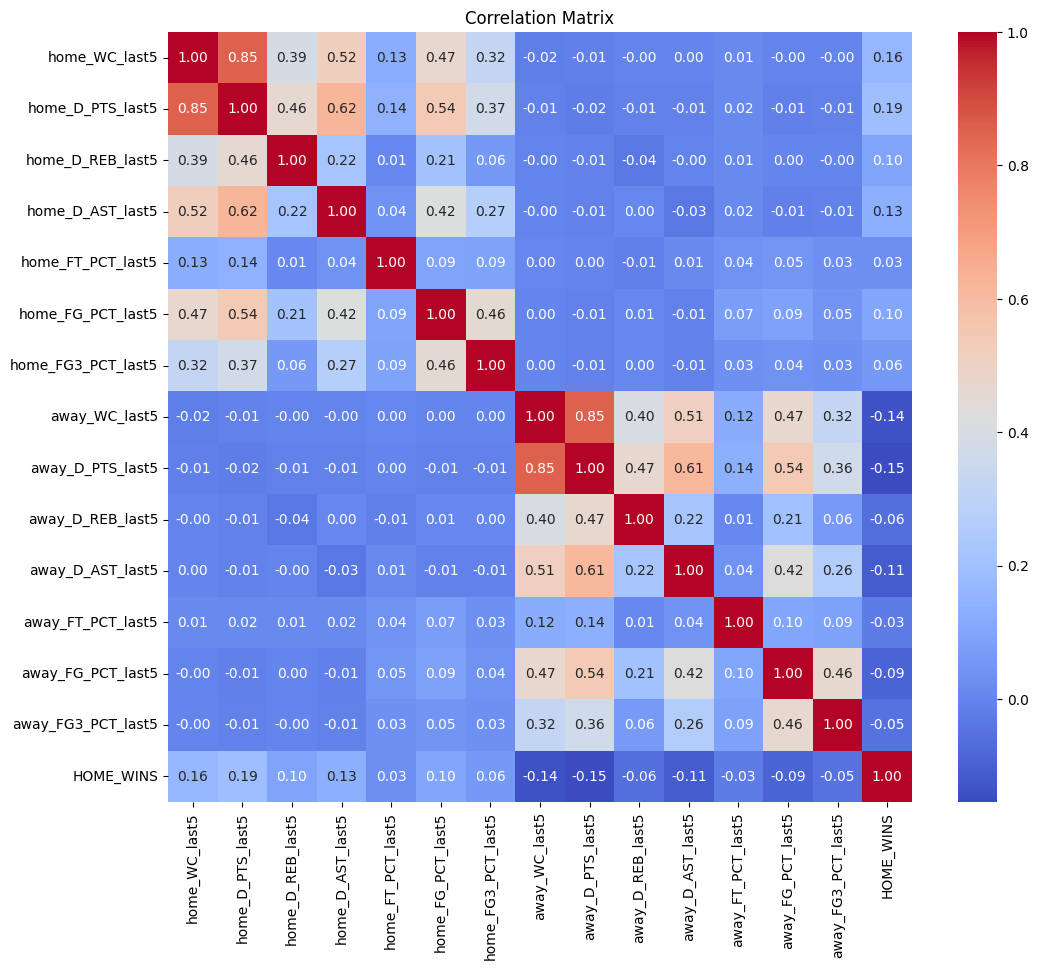

In [8]:
# Remove the last column
df_corr = df.iloc[:, :-1]

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
# plt.savefig('correlation_matrix.pdf')
plt.show()

**Remark:** by definition it is a block matrix and the two blocks are (almost) identical as expected.

In [9]:
# imbalance ratio

ir = max(df['HOME_WINS'].value_counts())/min(df['HOME_WINS'].value_counts())
ir

1.4333179935572942

# Train, Test and Fine Tuning on 2022

## Train/Test Split


In [10]:
X_test = df[df['GAME_DATE_EST'].str.split('-').str[0].astype(int) >= 2022]
# percentage test set
# print(len(X_test)/len(df)*100)


X_train = df[df['GAME_DATE_EST'].str.split('-').str[0].astype(int) < 2022]
y_train = X_train['HOME_WINS']
X_train = X_train.drop(columns=['HOME_WINS','GAME_DATE_EST'])

X_test = df[df['GAME_DATE_EST'].str.split('-').str[0].astype(int) >= 2022]
y_test = X_test['HOME_WINS']
X_test = X_test.drop(columns=['HOME_WINS','GAME_DATE_EST'])

In [11]:
# define a dictrionary to store all the metrics for each model
all_metrics = {}

## Support Vector Machines

In [12]:
best_svm = tuned_svm_model(X_train, y_train, X_test, y_test)


Tuning parameters: (1, 0.1, 'linear')
Tuning parameters: (1, 0.1, 'rbf')


In [99]:

svm_metrics = classification_assessment(best_svm, X_test, y_test)

all_metrics['SVM'] = svm_metrics

all_metrics['SVM']['f1']

0.7176781002638523

In [13]:
best_svm.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Random Forest

In [89]:
def tuned_random_forest_model(X_train, y_train, X_test, y_test):
    param_grid = {
    # 'n_estimators': [100, 200, 300],
     'n_estimators': [100], # test
    # 'n_estimators': [300], # best estimator
    # 'max_depth': [None, 10, 20],
     'max_depth': [10], # test
    # 'max_depth': [20],# best depth
    # 'min_samples_split': [2, 5],
    'min_samples_split': [2],
    # 'min_samples_leaf': [1, 2]
    'min_samples_leaf': [1]
    }

    best_model = None
    best_score = 0

    for params in itertools.product(*param_grid.values()):
        print("Tuning parameters:", params)
        # Create a dictionary of parameters for this iteration
        param_dict = dict(zip(param_grid.keys(), params))

        model = RandomForestClassifier(random_state=1,**param_dict)  # Unpack the dictionary
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_model = model

    return best_model

In [90]:
best_rf = tuned_random_forest_model(X_train, y_train, X_test, y_test)


Tuning parameters: (100, 10, 2, 1)


0.6113602391629297

In [100]:

rf_metrics = classification_assessment(best_rf, X_test, y_test)

all_metrics['RF'] = rf_metrics

all_metrics['RF']['f1']


0.70917225950783

In [91]:
best_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [39]:
best_rf.feature_importances_

array([0.05443744, 0.14949891, 0.06079925, 0.06676114, 0.06253461,
       0.06893766, 0.06554028, 0.04634566, 0.11062834, 0.05608181,
       0.06566868, 0.06243977, 0.06803911, 0.06228734])

## k-Nearest Neighbors

In [ ]:
best_knn = tuned_knn_model(X_train, y_train, X_test, y_test)


Tuning parameters: (100, 'uniform', 'euclidean')
Tuning parameters: (100, 'uniform', 'manhattan')
Tuning parameters: (100, 'distance', 'euclidean')
Tuning parameters: (100, 'distance', 'manhattan')
Tuning parameters: (120, 'uniform', 'euclidean')
Tuning parameters: (120, 'uniform', 'manhattan')
Tuning parameters: (120, 'distance', 'euclidean')
Tuning parameters: (120, 'distance', 'manhattan')
Tuning parameters: (140, 'uniform', 'euclidean')
Tuning parameters: (140, 'uniform', 'manhattan')
Tuning parameters: (140, 'distance', 'euclidean')
Tuning parameters: (140, 'distance', 'manhattan')
Tuning parameters: (160, 'uniform', 'euclidean')
Tuning parameters: (160, 'uniform', 'manhattan')
Tuning parameters: (160, 'distance', 'euclidean')
Tuning parameters: (160, 'distance', 'manhattan')
Tuning parameters: (180, 'uniform', 'euclidean')
Tuning parameters: (180, 'uniform', 'manhattan')
Tuning parameters: (180, 'distance', 'euclidean')
Tuning parameters: (180, 'distance', 'manhattan')
Tuning par

In [101]:

knn_metrics = classification_assessment(best_knn, X_test, y_test)

all_metrics['KNN'] = knn_metrics

all_metrics['KNN']['f1']

0.7118834080717489

In [17]:
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 160,
 'p': 2,
 'weights': 'uniform'}

## Naive Bayes (Bernoulli)

In [18]:
nb_classifier = BernoulliNB()

# Fit the model
nb_classifier.fit(X_train, y_train)


In [102]:

nb_metrics = classification_assessment(nb_classifier, X_test, y_test)

all_metrics['NB'] = nb_metrics

all_metrics['NB']['f1']

0.6694214876033058

## Dummy

In [19]:
dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train, y_train)


In [103]:

dummy_metrics = classification_assessment(dummy_classifier, X_test, y_test)

all_metrics['Dummy'] = dummy_metrics

all_metrics['Dummy']['f1']

0.7232824427480916

## Nice Plots

In [116]:
# Sort the all_metrics dictionary by greatest accuracy
sorted_all_metrics = dict(sorted(all_metrics.items(), key=lambda item: item[1]['accuracy'], reverse=True))
sorted_all_metrics

{'KNN': {'accuracy': 0.6158445440956651,
  'precision_recall_auc': 0.65505743037772,
  'roc_auc': 0.60396233281776,
  'fpr_tpr': ([0.0,
    0.0017241379310344827,
    0.0017241379310344827,
    0.0034482758620689655,
    0.0034482758620689655,
    0.0034482758620689655,
    0.0034482758620689655,
    0.0034482758620689655,
    0.005172413793103448,
    0.006896551724137931,
    0.006896551724137931,
    0.006896551724137931,
    0.01206896551724138,
    0.013793103448275862,
    0.017241379310344827,
    0.02586206896551724,
    0.03793103448275862,
    0.04655172413793104,
    0.05,
    0.06206896551724138,
    0.06379310344827586,
    0.07413793103448275,
    0.07931034482758621,
    0.09137931034482759,
    0.09310344827586207,
    0.1103448275862069,
    0.12241379310344827,
    0.1310344827586207,
    0.13793103448275862,
    0.14655172413793102,
    0.16034482758620688,
    0.16896551724137931,
    0.1793103448275862,
    0.20344827586206896,
    0.21379310344827587,
    0.220689

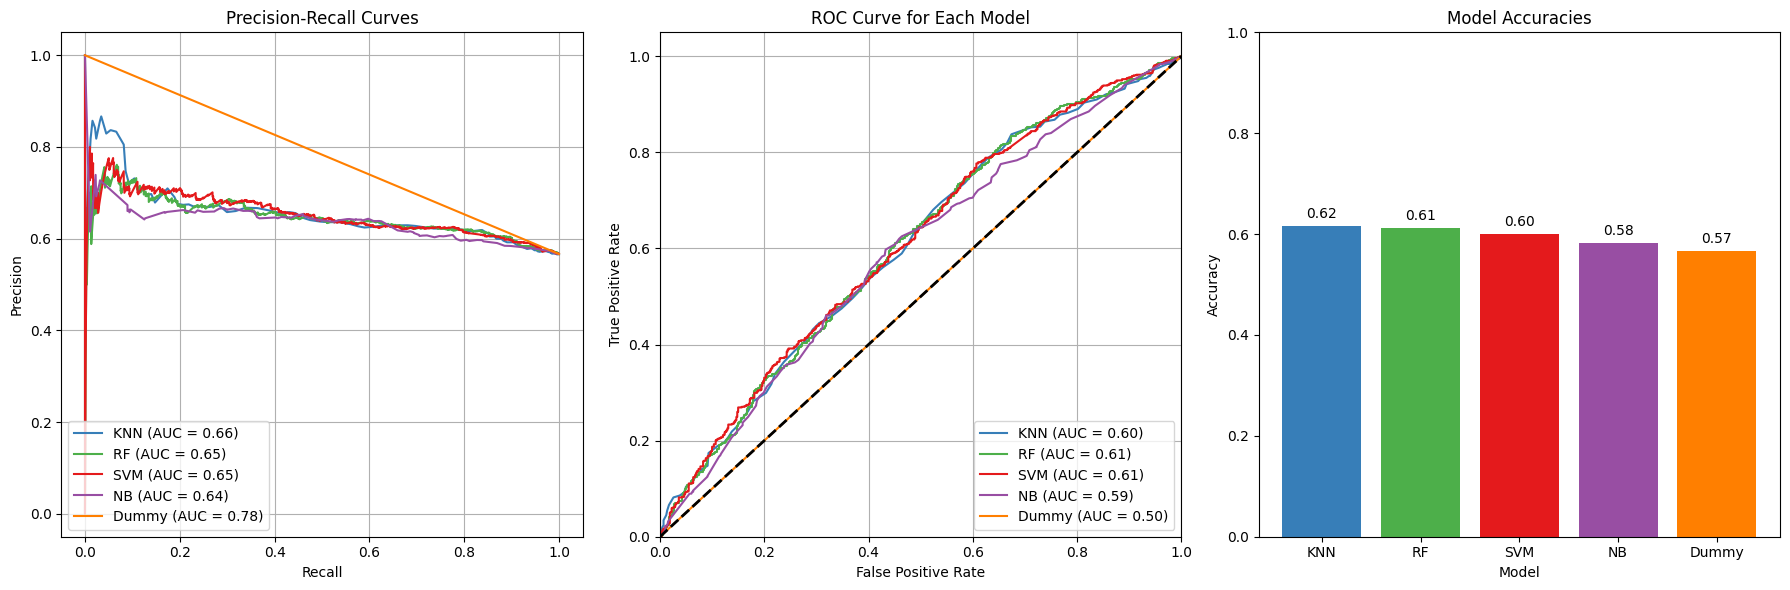

In [117]:
# Define a color map for each model
palette = sns.color_palette("Set1", 5)
color_map = {
    'SVM': palette[0],
    'KNN': palette[1],
    'RF': palette[2],
    'NB': palette[3],
    'Dummy': palette[4]
}

# Create a single figure with 3 subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Precision-Recall Curve
for model_name, metrics in sorted_all_metrics.items():
    precision, recall = metrics["precision_recall"]
    color = color_map[model_name]
    axs[0].plot(recall, precision, label=f'{model_name} (AUC = {metrics["precision_recall_auc"]:.2f})', color=color)

axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curves')
axs[0].legend(loc='lower left')
axs[0].grid(True)

# ROC Curve
for model_name, metrics in sorted_all_metrics.items():
    fpr, tpr = metrics['fpr_tpr']
    color = color_map[model_name]
    axs[1].plot(fpr, tpr, label=f'{model_name} (AUC = {metrics["roc_auc"]:.2f})', color=color)

axs[1].plot([0, 1], [0, 1], 'k--', lw=2)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC Curve for Each Model')
axs[1].legend(loc='lower right')
axs[1].grid(True)

# Accuracies Bar Plot
accuracies = {model: metrics['accuracy'] for model, metrics in sorted_all_metrics.items()}
colors = [color_map[model] for model in accuracies.keys()]
axs[2].bar(accuracies.keys(), accuracies.values(), color=colors)

# Add the accuracy values on top of each bar
for i, (model, accuracy) in enumerate(accuracies.items()):
    axs[2].text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

axs[2].set_xlabel('Model')
axs[2].set_ylabel('Accuracy')
axs[2].set_title('Model Accuracies')
axs[2].set_ylim(0, 1)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

plt.savefig('performancies2022.pdf')

# Show the combined plots
plt.show()


## Save all on file

Save everything (roc curve included) on a `.json` file. In this way we can do eventually other plots without training the models.

In [118]:
import json
import numpy as np

# Save the all_metrics dictionary to a JSON file
# Convert NumPy arrays to lists before saving
for model_name, metrics in all_metrics.items():
    for key, value in metrics.items():
        if isinstance(value, np.ndarray):
            metrics[key] = value.tolist()  # Convert ndarray to list
        # Check if value is a tuple containing ndarrays
        if isinstance(value, tuple) and any(isinstance(item, np.ndarray) for item in value):
            metrics[key] = tuple(item.tolist() if isinstance(item, np.ndarray) else item for item in value)

with open('all_metrics.json', 'w') as f:
    json.dump(all_metrics, f, indent=4)

Save only the main metrics on a `.txt` file, helpful for the report.

In [106]:
# Extract the required metrics
metrics_to_save = {model: {metric: values[metric] for metric in ["accuracy", "precision_recall_auc", "roc_auc", "f1"]} for model, values in all_metrics.items()}

# Save to a text file
with open('model_metrics.txt', 'w') as f:
    for model, metrics in metrics_to_save.items():
        f.write(f"Model: {model}\n")
        for metric, value in metrics.items():
            f.write(f"{metric}: {value}\n")
        f.write("\n")

# Models Validation over the Previous Years

In [23]:
# List of models
models = [
    RandomForestClassifier(random_state=42, n_estimators=300, max_depth=20),
    BernoulliNB(),
    DummyClassifier(),
    KNeighborsClassifier(n_neighbors=160, weights='uniform', metric='manhattan'),
    SVC(probability=True)
]

century_metrics = {}

# Loop through models
for model in models:

    target_years = df['GAME_DATE_EST'].str.split('-').str[0].astype(int)

    for year in range(min(target_years) + 1, max(target_years) + 1):

        # Get the model's name
        model_name = type(model).__name__

        # Rolling origin forecasting (for validation)
        X_train = df[target_years < year]
        y_train = X_train['HOME_WINS']
        X_train = X_train.drop(columns=['HOME_WINS', 'GAME_DATE_EST'])

        # Only test on `year`
        X_test = df[target_years == year]
        y_test = X_test['HOME_WINS']
        X_test = X_test.drop(columns=['HOME_WINS', 'GAME_DATE_EST'])

        # Train the model
        model.fit(X_train, y_train)

        # Test the model
        y_pred = model.predict(X_test)

         # Initialize the nested structure if not already present
        if model_name not in century_metrics:
            century_metrics[model_name] = {}

        # Store the assessment under the correct year
        century_metrics[model_name][year] = classification_assessment(model, X_test, y_test)

        print(f"{model_name} - Training in year {year}")

RandomForestClassifier - Training in year 2004
RandomForestClassifier - Training in year 2005
RandomForestClassifier - Training in year 2006
RandomForestClassifier - Training in year 2007
RandomForestClassifier - Training in year 2008
RandomForestClassifier - Training in year 2009
RandomForestClassifier - Training in year 2010
RandomForestClassifier - Training in year 2011
RandomForestClassifier - Training in year 2012
RandomForestClassifier - Training in year 2013
RandomForestClassifier - Training in year 2014
RandomForestClassifier - Training in year 2015
RandomForestClassifier - Training in year 2016
RandomForestClassifier - Training in year 2017
RandomForestClassifier - Training in year 2018
RandomForestClassifier - Training in year 2019
RandomForestClassifier - Training in year 2020
RandomForestClassifier - Training in year 2021
RandomForestClassifier - Training in year 2022
BernoulliNB - Training in year 2004
BernoulliNB - Training in year 2005
BernoulliNB - Training in year 2006

In [131]:
# Find the all-time maximum accuracy for each model
max_accuracies = {model: max(year_data['accuracy'] for year_data in metrics.values()) for model, metrics in century_metrics.items()}

# Sort the century_metrics dictionary by the all-time maximum accuracy
sorted_century_metrics = dict(
    sorted(
        century_metrics.items(),
        key=lambda item: max_accuracies[item[0]],
        reverse=True
    )
)

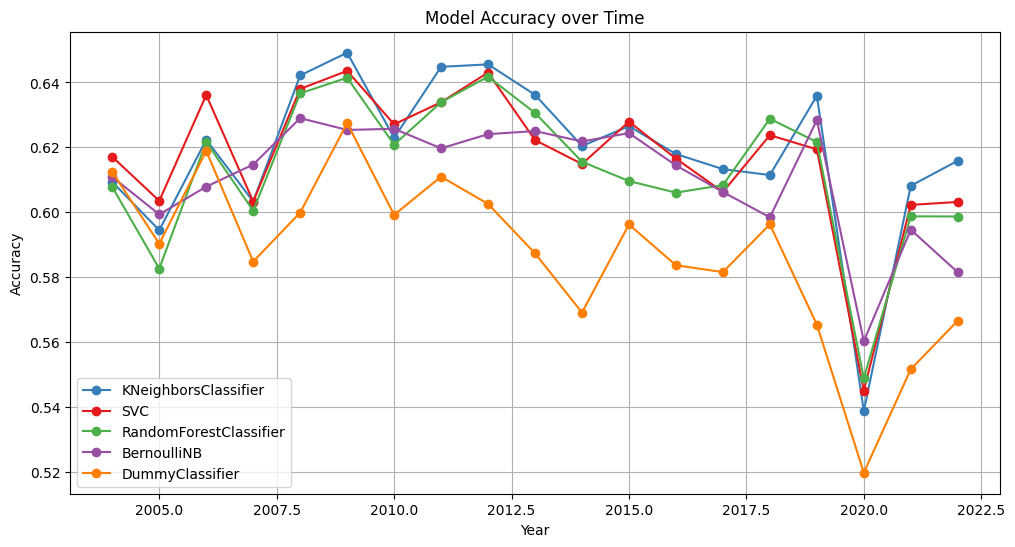

In [136]:
color_map2 = {
    'SVC': palette[0],
    'KNeighborsClassifier': palette[1],
    'RandomForestClassifier': palette[2],
    'BernoulliNB': palette[3],
    'DummyClassifier': palette[4]
}

# plot for each model the accuracy as function of year


plt.figure(figsize=(12, 6))

for model_name, years in sorted_century_metrics.items():
    years_list = sorted(years.keys())  # Sort the years for proper plotting
    accuracies = [years[year]['accuracy'] for year in years_list]
    plt.plot(years_list, accuracies, marker='o', linestyle='-', label=model_name, color=color_map2[model_name])

plt.xlabel("Year")
plt.ylabel("Accuracy")
plt.title("Model Accuracy over Time")
plt.legend()
plt.grid(True)
plt.savefig('accuracy_over_time.pdf')
plt.show()

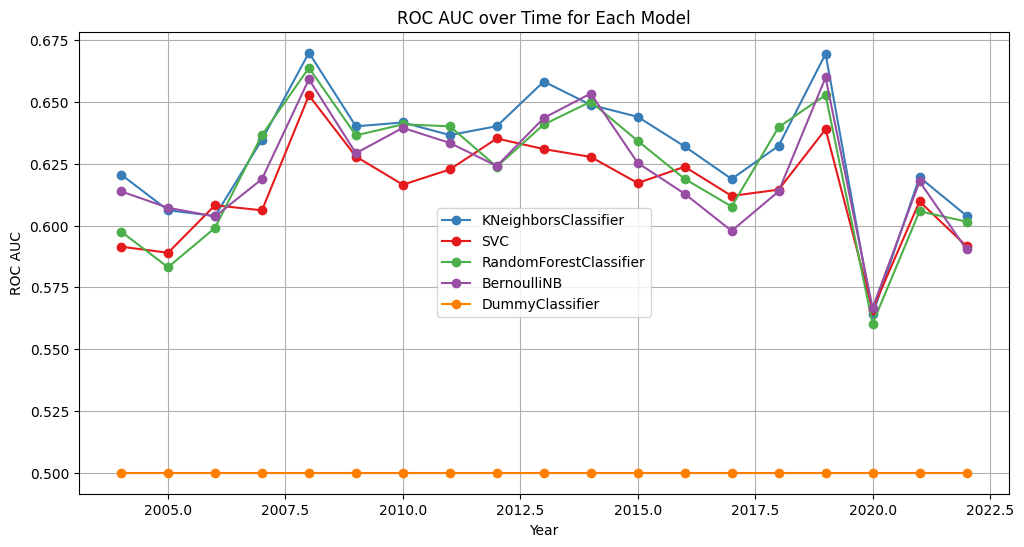

In [137]:
# plot for each model the accuracy as function of year
plt.figure(figsize=(12, 6))

for model_name, years in sorted_century_metrics.items():
    roc_aucs = [metrics['roc_auc'] for year, metrics in years.items()]
    years_list = list(years.keys())  # Convert dictionary keys to a list
    plt.plot(years_list, roc_aucs, label=model_name, marker='o', color=color_map2[model_name])

plt.xlabel('Year')
plt.ylabel('ROC AUC')
plt.title('ROC AUC over Time for Each Model')
plt.legend()
plt.grid(True)
plt.savefig('roc_auc_over_time.pdf')
plt.show()


/tmp/ipykernel_7659/3503845396.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(accuracy_data.values(), labels=accuracy_data.keys(), patch_artist=True, medianprops=medianprops)


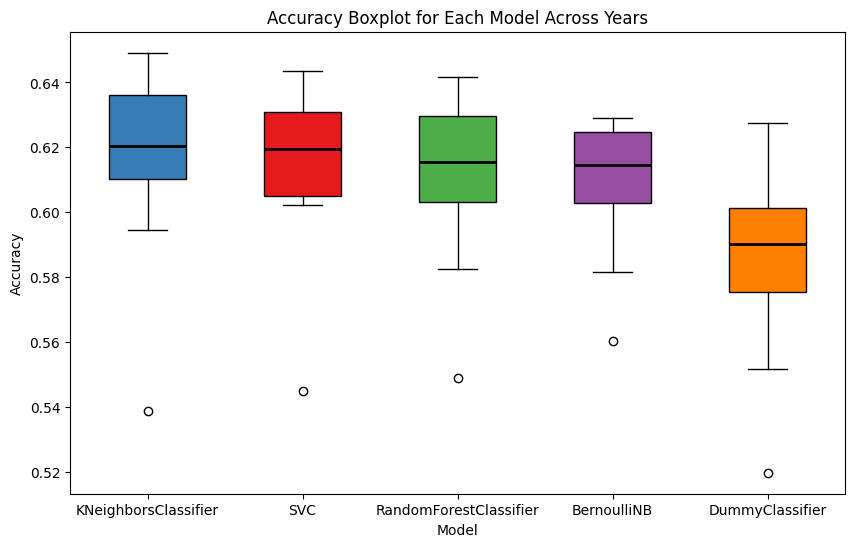

In [138]:
# Extract accuracy for each model and year
accuracy_data = {}
for model_name, years in sorted_century_metrics.items():
    accuracy_data[model_name] = [metrics['accuracy'] for metrics in years.values()]

# Define the properties for the median line
medianprops = dict(color='black', linewidth=2)
# Create the boxplot
plt.figure(figsize=(10, 6))
# Create the boxplot with patch_artist=True
boxplot = plt.boxplot(accuracy_data.values(), labels=accuracy_data.keys(), patch_artist=True, medianprops=medianprops)

# Apply colors to each box
for patch, model in zip(boxplot['boxes'], accuracy_data.keys()):
    patch.set_facecolor(color_map2[model])

# plt.boxplot(accuracy_data.values(), labels=accuracy_data.keys(), boxprops=boxprops_list)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Boxplot for Each Model Across Years')
plt.savefig('acc_boxplot.pdf')
plt.show()

In [27]:
'''
TODO (eventually):

1. Statistical significance testing to see which is the best learning
technique. Under normality assumption we can do a t-test for the mean value
of the 5 accuracies vectors. Otherwise, non-parametric test.

'''

'\nTODO (eventually):\n\n1. Statistical significance testing to see which is the best learning\ntechnique. Under normality assumption we can do a t-test for the mean value\nof the 5 accuracies vectors. Otherwise, non-parametric test.\n\n'

In [28]:
# Find the greatest ROC AUC value in the century_metrics dictionary
greatest_roc_auc = 0
model_with_greatest_roc_auc = None
year_with_greatest_roc_auc = None

for model_name, years in century_metrics.items():
    for year, metrics in years.items():
        if metrics['roc_auc'] > greatest_roc_auc:
            greatest_roc_auc = metrics['roc_auc']
            model_with_greatest_roc_auc = model_name
            year_with_greatest_roc_auc = year

print(f"The greatest ROC AUC value is {greatest_roc_auc:.4f}, achieved by the {model_with_greatest_roc_auc} model in the year {year_with_greatest_roc_auc}.")

The greatest ROC AUC value is 0.6699, achieved by the KNeighborsClassifier model in the year 2008.


In [29]:
# Find the greatest accuracy value in the century_metrics dictionary
greatest_accuracy = 0
model_with_greatest_accuracy = None
year_with_greatest_accuracy = None

for model_name, years in century_metrics.items():
    for year, metrics in years.items():
        if metrics['accuracy'] > greatest_accuracy:
            greatest_accuracy = metrics['accuracy']
            model_with_greatest_accuracy = model_name
            year_with_greatest_accuracy = year

print(f"The greatest accuracy value is {greatest_accuracy:.4f}, achieved by the {model_with_greatest_accuracy} model in the year {year_with_greatest_accuracy}.")

The greatest accuracy value is 0.6492, achieved by the KNeighborsClassifier model in the year 2009.


In [30]:
# prompt: mean and standard dev of accuracy for each model using century_metrics dictionary

import numpy as np

# Assuming 'century_metrics' is defined as in your provided code.

model_stats = {}
for model_name, years in century_metrics.items():
  accuracies = [metrics['accuracy'] for metrics in years.values()]
  model_stats[model_name] = {
      'mean_accuracy': np.mean(accuracies),
      'std_accuracy': np.std(accuracies)
  }

for model_name, stats in model_stats.items():
  print(f"Model: {model_name}")
  print(f"  Mean Accuracy: {stats['mean_accuracy']:.4f}")
  print(f"  Standard Deviation of Accuracy: {stats['std_accuracy']:.4f}")
  print("-"*20)

Model: RandomForestClassifier
  Mean Accuracy: 0.6133
  Standard Deviation of Accuracy: 0.0219
--------------------
Model: BernoulliNB
  Mean Accuracy: 0.6111
  Standard Deviation of Accuracy: 0.0176
--------------------
Model: DummyClassifier
  Mean Accuracy: 0.5875
  Standard Deviation of Accuracy: 0.0248
--------------------
Model: KNeighborsClassifier
  Mean Accuracy: 0.6188
  Standard Deviation of Accuracy: 0.0242
--------------------
Model: SVC
  Mean Accuracy: 0.6172
  Standard Deviation of Accuracy: 0.0216
--------------------


## Save the data on file

In [135]:
import json

# Convert NumPy arrays to lists before saving
for model_name, years in century_metrics.items():
    for year, metrics in years.items():
        for key, value in metrics.items():
            if isinstance(value, np.ndarray):
                metrics[key] = value.tolist()  # Convert ndarray to list
            # Check if value is a tuple containing ndarrays
            if isinstance(value, tuple) and any(isinstance(item, np.ndarray) for item in value):
                metrics[key] = tuple(item.tolist() if isinstance(item, np.ndarray) else item for item in value)

with open('century_metrics.json', 'w') as f:
    json.dump(century_metrics, f, indent=4)